In [1]:
%matplotlib inline
from msmbuilder.featurizer import DihedralFeaturizer
from msmbuilder.featurizer import ContactFeaturizer
from msmbuilder.decomposition import tICA
from msmbuilder.preprocessing import RobustScaler
from msmbuilder.preprocessing import StandardScaler
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import MarkovStateModel
from msmbuilder.msm import BayesianMarkovStateModel
from msmbuilder.hmm import GaussianHMM
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
import msmexplorer as msme
import time
rs = np.random.RandomState(42)

sns.set_style('ticks')
colors = sns.color_palette()

/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core imp

# Load data

In [3]:
start = time.time()

from msmbuilder.dataset import dataset
trajs = dataset("*.xtc",
              topology='md.loop_286-306_2_1.gro')

#trajs = [t[::10] for t in trajs]

print("{} trajectories".format(len(trajs)))
# msmbuilder does not keep track of units! You must keep track of your
# data's timestep
to_ns = 0.01
print("with length {} ns".format(set(len(x)*to_ns for x in trajs)))

15 trajectories
with length {500.01} ns


# Feature tests

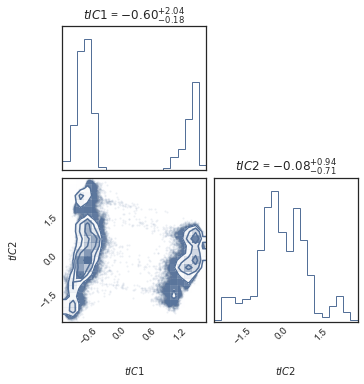

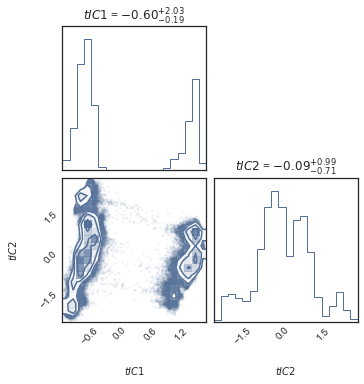

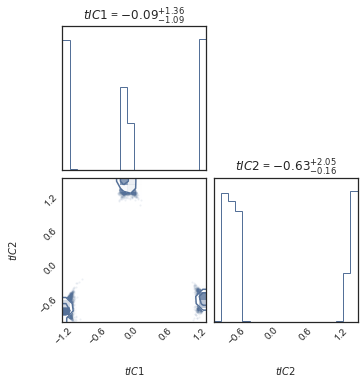

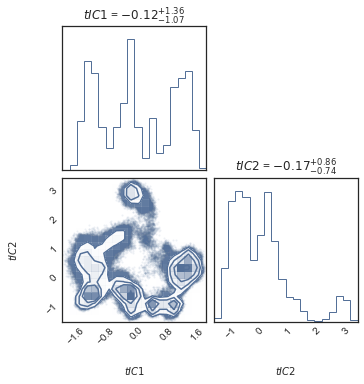

In [140]:
featurizer_psc = DihedralFeaturizer(types=['phi', 'psi', 'chi1'])#, 'omega', 'chi1'])
diheds_psc = featurizer.fit_transform(trajs)
scaler = RobustScaler()
scaled_data_psc = scaler.fit_transform(diheds)
tica_model = tICA(lag_time=200, n_components=2, kinetic_mapping=True)
tica_trajs_psc = tica_model.fit_transform(scaled_data_psc)
txx_psc = np.concatenate(tica_trajs_psc)


featurizer_ps = DihedralFeaturizer(types=['phi', 'psi'])
diheds_ps = featurizer_ps.fit_transform(trajs)
scaled_data_ps = scaler.fit_transform(diheds_ps)
tica_trajs_ps = tica_model.fit_transform(scaled_data_ps)
txx_ps = np.concatenate(tica_trajs_ps)

featurizer_all = DihedralFeaturizer(types=['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4'])
diheds_all = featurizer_all.fit_transform(trajs)
scaled_data_all = scaler.fit_transform(diheds_all)
tica_trajs_all = tica_model.fit_transform(scaled_data_all)
txx_all = np.concatenate(tica_trajs_all)


featurizer_ca = ContactFeaturizer(scheme='closest-heavy')
diheds_ca = featurizer_ca.fit_transform(trajs)
scaled_data_ca = scaler.fit_transform(diheds_ca)
tica_trajs_ca = tica_model.fit_transform(scaled_data_ca)
txx_ca = np.concatenate(tica_trajs_ca)

_ = msme.plot_histogram(txx_psc, bins=20, labels=['$tIC1$', '$tIC2$'],
                    color='rawdenim', smooth=0.5, show_titles=True, scale_hist=False)
__ = msme.plot_histogram(txx_ps, bins=20, labels=['$tIC1$', '$tIC2$'],
                    color='rawdenim', smooth=0.5, show_titles=True, scale_hist=False)
___ = msme.plot_histogram(txx_all, bins=20, labels=['$tIC1$', '$tIC2$'],
                    color='rawdenim', smooth=0.5, show_titles=True, scale_hist=False)
____ = msme.plot_histogram(txx_ca, bins=20, labels=['$tIC1$', '$tIC2$'],
                    color='rawdenim', smooth=0.5, show_titles=True, scale_hist=False)







# Featurisation, scaling, dimensionality reduction

In [137]:
featurizer = DihedralFeaturizer(types=['phi', 'psi', 'chi1'])#, 'omega', 'chi1'])
diheds = featurizer.fit_transform(trajs)

In [138]:
start_scaling = time.time()

scaler = RobustScaler()
scaled_data = scaler.fit_transform(diheds)

end_scaling = time.time()
print("Time scaling: ", end_scaling - start_scaling)

tica_model = tICA(lag_time=200, n_components=5, kinetic_mapping=True)
tica_trajs = tica_model.fit_transform(scaled_data)



Time scaling:  7.488372087478638


/Users/sbamos/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/sbamos/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


IndexError: index 2 is out of bounds for axis 1 with size 2

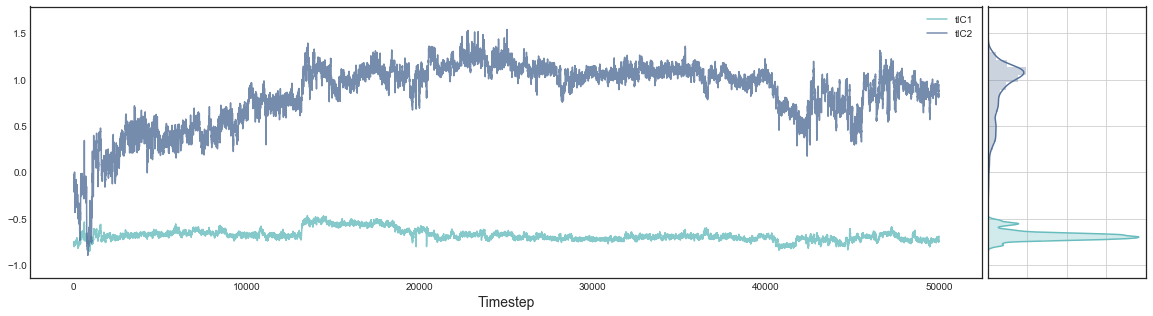

In [139]:
ax, side_ax = msme.plot_trace(tica_trajs[0][:, 0], window=10,
                              label='tIC1', xlabel=False)
_ = msme.plot_trace(tica_trajs[0][:, 1], window=10, label='tIC2',
                    xlabel='Timestep', color='rawdenim', ax=ax,
                    side_ax=side_ax)
__ = msme.plot_trace(tica_trajs[0][:, 2], window=10, label='tIC3',
                    xlabel='Timestep', color='dijon', ax=ax,
                    side_ax=side_ax)
___ = msme.plot_trace(tica_trajs[0][:, 3], window=10, label='tIC4',
                    xlabel='Timestep', color='carbon', ax=ax,
                    side_ax=side_ax)
____ = msme.plot_trace(tica_trajs[0][:, 4], window=10, label='tIC5',
                    xlabel='Timestep', color='pomegranate', ax=ax,
                    side_ax=side_ax)

In [ ]:
txx = np.concatenate(tica_trajs)
_ = msme.plot_histogram(txx, bins=20, labels=['$tIC1$', '$tIC2$', '$tIC3$', '$tIC4$', '$tIC5$'],
                    color='rawdenim', smooth=0.5, show_titles=True, scale_hist=False)

# Clustering, residuals

Text(0,0.5,'tIC2')

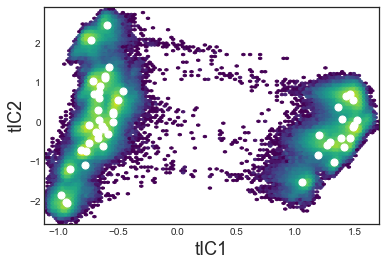

In [71]:
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.cluster import KCenters
clusterer = MiniBatchKMeans(n_clusters=50, random_state=rs)
clustered_trajs = clusterer.fit_transform(tica_trajs)

from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')
plt.scatter(clusterer.cluster_centers_[:,0],
            clusterer.cluster_centers_[:,1], 
            s=50, c='w')
plt.xlabel('tIC1', fontsize=18)
plt.ylabel('tIC2', fontsize=18)

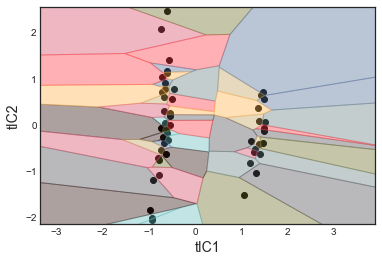

In [72]:
_ = msme.plot_voronoi(clusterer, xlabel='tIC1', ylabel='tIC2')

/Users/sbamos/anaconda3/lib/python3.6/site-packages/msmbuilder/msm/msm.py:183: UserWarning: reversible_type='mle' and ergodic_cutoff <= 0 are not generally compatible
  warnings.warn("reversible_type='mle' and ergodic_cutoff <= 0 "


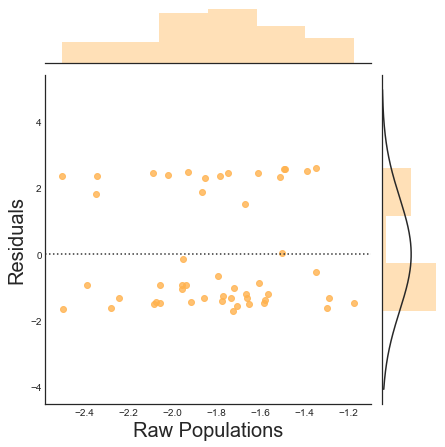

In [73]:
msm = MarkovStateModel(lag_time=400, n_timescales=5, ergodic_cutoff=0)
assigns = msm.fit_transform(clustered_trajs)

_ = msme.plot_pop_resids(msm, color='tarragon')

# MSM

/Users/sbamos/anaconda3/lib/python3.6/site-packages/msmbuilder/msm/msm.py:567: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigma2)


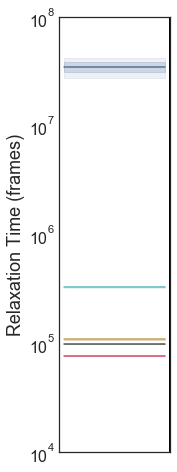

In [74]:
_ = msme.plot_timescales(msm, ylabel=r'Relaxation Time (frames)')

/Users/sbamos/anaconda3/lib/python3.6/site-packages/msmbuilder/msm/msm.py:567: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigma2)


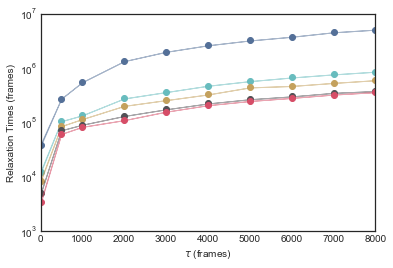

In [76]:
msm_list = [
    MarkovStateModel(lag_time=x, n_timescales=5, verbose=False, ergodic_cutoff=0, reversible_type='transpose')
                     for x in [10, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
]

for msm in msm_list:
    msm.fit(clustered_trajs)
    
_ = msme.plot_implied_timescales(msm_list,
                                  xlabel=r'$\tau$ (frames)',
                                  ylabel='Relaxation Times (frames)')



In [77]:
msm = msm_list[7]  # Choose the appropriate MSM from the list

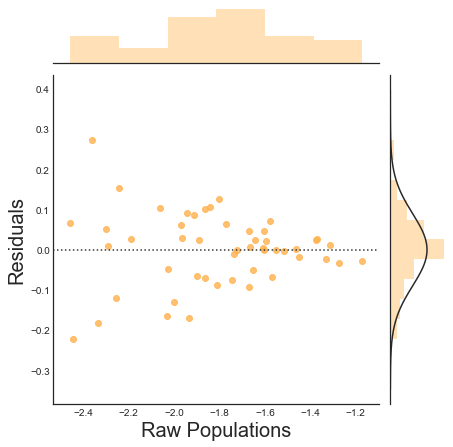

In [78]:
_ = msme.plot_pop_resids(msm, color='tarragon')

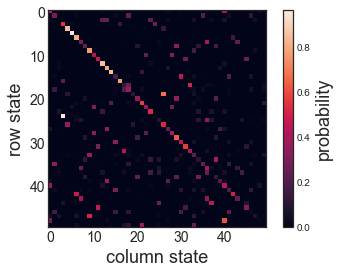

In [133]:
plt.imshow(msm.transmat_)
plt.xlabel('column state', fontsize=18)
plt.ylabel('row state', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cbar = plt.colorbar()
cbar.set_label('probability', fontsize=18)
cbar.get_ticks

In [80]:
for i, (ts, ts_u) in enumerate(zip(msm.timescales_, msm.uncertainty_timescales())):
    timescale_ns = ts *  0.01
    uncertainty_ns = ts_u * 0.01
    print('Timescale %d: %.2f ± %.2f ns' % ((i + 1), timescale_ns, uncertainty_ns))


Timescale 1: 37919.25 ± 30.75 ns
Timescale 2: 6753.27 ± 4.36 ns
Timescale 3: 4717.29 ± 2.06 ns
Timescale 4: 3032.35 ± 0.58 ns
Timescale 5: 2843.47 ± 0.85 ns


# Transitions

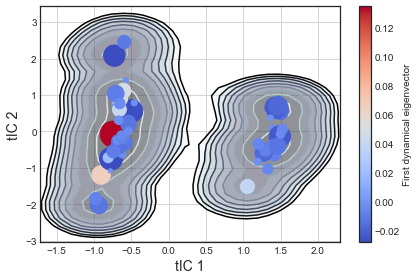

In [81]:
assignments = clusterer.partial_transform(txx)
#assignments = msm.partial_transform(assignments)
msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000,
#                      pi=msm.populations_[assignments],
                      xlabel='tIC 1', ylabel='tIC 2')
plt.scatter(clusterer.cluster_centers_[msm.state_labels_, 0],
            clusterer.cluster_centers_[msm.state_labels_, 1],
            s=1e4 * msm.populations_,       # size by population
            c=msm.left_eigenvectors_[:, 1], # color by eigenvector
            cmap="coolwarm",
            zorder=3) 
plt.colorbar(label='First dynamical eigenvector')
plt.tight_layout()
# The microstate centers are shown as circles on the tIC heatmap. 
# They are sized according to state population. 
# They are colored according to the first dynamical eigenvector. 
# The slowest processes is a transition from blue states to red.

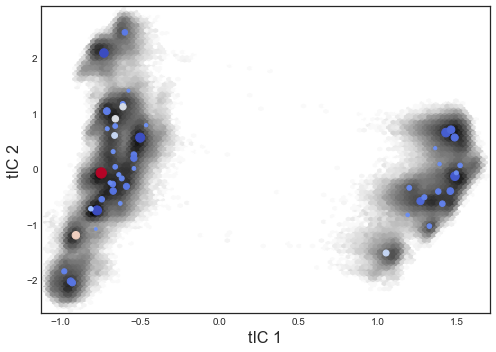

In [82]:
## Plot microstates
def plot_microstates(ax):
    ax.hexbin(txx[:, 0], txx[:, 1],
              cmap='Greys',
              mincnt=1,
              bins='log',
              )

    scale = 100 / np.max(msm.populations_)
    add_a_bit = 5
    ax.scatter(clusterer.cluster_centers_[msm.state_labels_, 0],
               clusterer.cluster_centers_[msm.state_labels_, 1],
               s=scale * msm.populations_ + add_a_bit,
               c=msm.left_eigenvectors_[:, 1],
               cmap='coolwarm'
               )
    ax.set_xlabel("tIC 1", fontsize=16)
    ax.set_ylabel("tIC 2", fontsize=16)
    #ax.colorbar(label='First Dynamical Eigenvector', fontsize=16)


## Plot
fig, ax = plt.subplots(figsize=(7, 5))
plot_microstates(ax)
fig.tight_layout()
plt.show()
#fig.savefig('msm-microstates.pdf')

# The microstate centers are shown as circles on the tIC heatmap. 
# They are sized according to state population. 
# They are colored according to the first dynamical eigenvector. 
# The slowest processes is a transition from red states to blue.

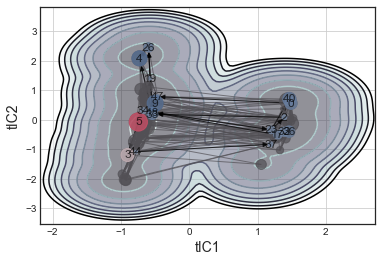

In [86]:
data = np.concatenate(tica_trajs, axis=0)
#pi_0 = msm.populations_[np.concatenate(assignments, axis=0)]
rs = np.random.RandomState(42) 

ax = msme.plot_free_energy(data, obs=(0, 1), temperature=323., n_samples=10000,
#                          pi=pi_0, 
                          gridsize=100, vmax=10., vmin=-1.,
                          n_levels=10, cut=5, xlabel='tIC1',
                          ylabel='tIC2', random_state=rs,
                          shade=True,
                      clabel=False,
                      clabel_kwargs={'fmt': '%.1f'},
                      cbar=False,
                      cbar_kwargs={'format': '%.1f', 'label': 'Free energy (kcal/mol)'})


pos = dict(zip(range(clusterer.n_clusters), clusterer.cluster_centers_[:,[0,1]]))
#pos = dict(zip(range(clusterer.n_clusters), clusterer.cluster_centers_))
_ = msme.plot_msm_network(msm, pos=pos, node_color='carbon',
                          with_labels=False)

# Top Transition Pathway
w = (msm.left_eigenvectors_[:, 1] - msm.left_eigenvectors_[:, 1].min())
w /= w.max()
cmap = msme.utils.make_colormap(['rawdenim', 'lightgrey', 'pomegranate'])
_ = msme.plot_tpaths(msm, [5], [26], pos=pos, node_color=cmap(w),
                     alpha=.7, edge_color='black', ax=ax, num_paths=3)

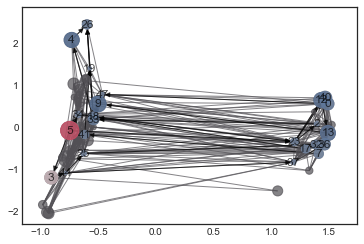

In [88]:
# MSM Network
_ = msme.plot_msm_network(msm, pos=pos, node_color='carbon',
                          with_labels=False)

# Top Transition Pathway
w = (msm.left_eigenvectors_[:, 1] - msm.left_eigenvectors_[:, 1].min())
w /= w.max()
cmap = msme.utils.make_colormap(['rawdenim', 'lightgrey', 'pomegranate'])
_ = msme.plot_tpaths(msm, [5], [26], pos=pos, node_color=cmap(w), num_paths=5,
                     alpha=.7, edge_color='black')

In [89]:
print((msm.timescales_)/100)

[ 37919.25426859   6753.27133492   4717.28871786   3032.34695303
   2843.47436805]


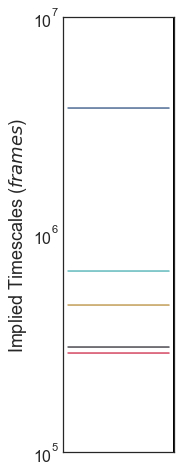

In [90]:
msme.plot_timescales(msm, n_timescales=5,
                     ylabel='Implied Timescales ($frames$)')

# Macrostates

In [93]:
from msmbuilder.lumping import PCCAPlus
pcca = PCCAPlus.from_msm(msm, n_macrostates=5)
macro_trajs = pcca.transform(clustered_trajs)

Optimization terminated successfully.
         Current function value: -4.939768
         Iterations: 21
         Function evaluations: 191


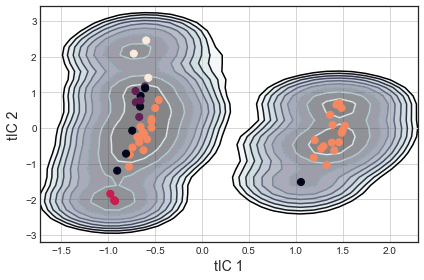

In [94]:
msme.plot_free_energy(txx, obs=(0, 1), n_samples=10000,
#                      pi=msm.populations_[assignments],
                      xlabel='tIC 1', ylabel='tIC 2')
plt.scatter(clusterer.cluster_centers_[msm.state_labels_, 0],
            clusterer.cluster_centers_[msm.state_labels_, 1],
            s=50,
            c=pcca.microstate_mapping_,
            zorder=3
           )
plt.tight_layout()

# Individual trajs

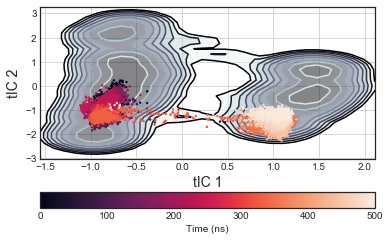

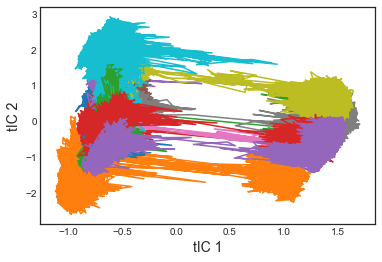

In [95]:
ax = msme.plot_free_energy(
    txx, obs=(0, 1), n_samples=100000,
    random_state=rs,
    shade=True,
    clabel=False,
    clabel_kwargs={'fmt': '%.1f'},
    cbar=False,
    cbar_kwargs={'format': '%.1f', 'label': 'Free energy (kcal/mol)'})

msme.plot_trace2d(
    data=tica_trajs[1], ts=0.01, ax=ax,
    scatter_kwargs={'s': 2},
    cbar_kwargs={'format': '%d', 'label': 'Time (ns)',
                 'orientation': 'horizontal'},
    xlabel='tIC 1', ylabel='tIC 2'
)
# Finally, let's plot every trajectory to see the individual sampled regions
f, ax = plt.subplots()
msme.plot_trace2d(tica_trajs, ax=ax, xlabel='tIC 1', ylabel='tIC 2')
plt.show()

/Users/sbamos/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


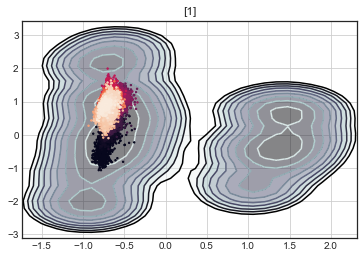

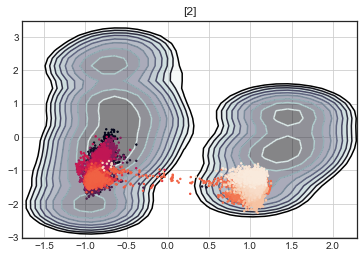

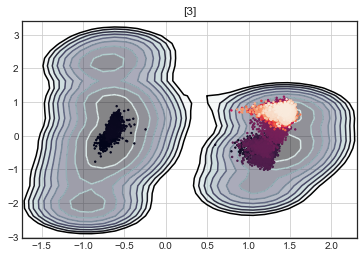

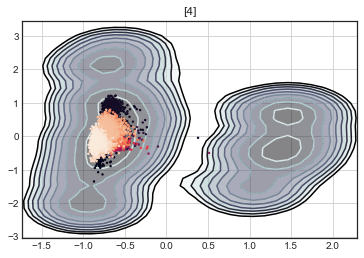

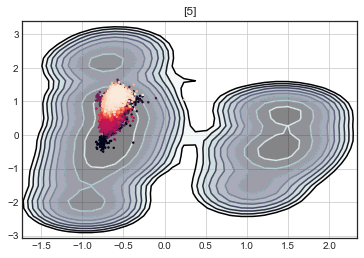

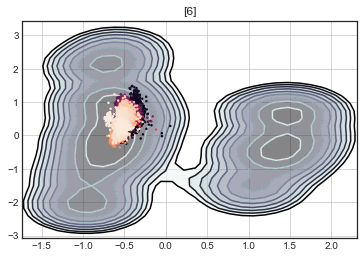

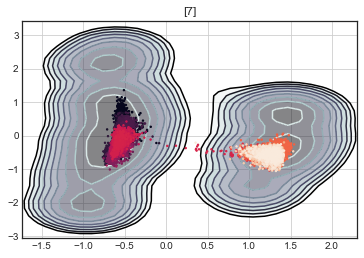

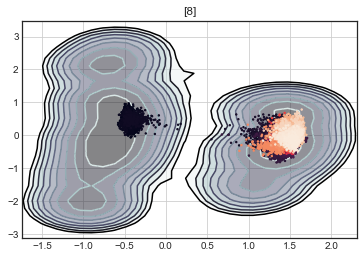

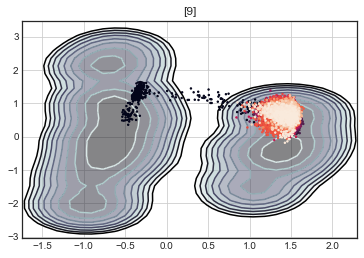

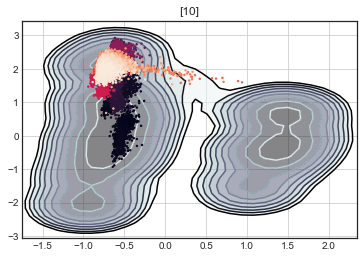

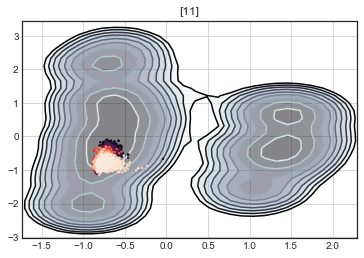

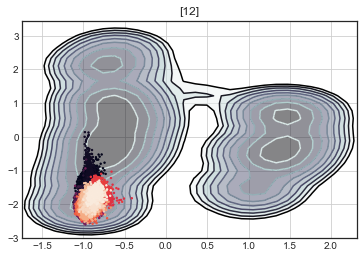

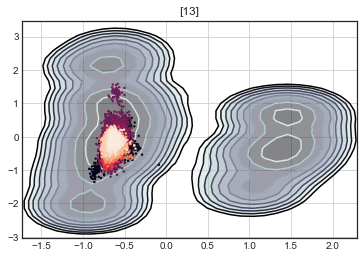

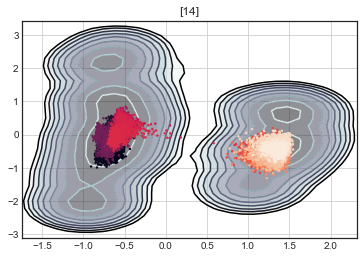

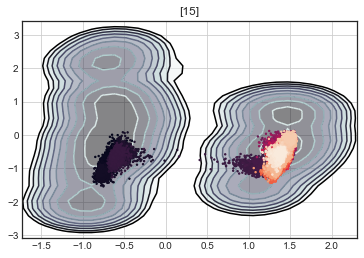

In [96]:
for i in range(len(tica_trajs)):
    ax = msme.plot_free_energy(
    txx, obs=(0, 1), n_samples=10000,
    random_state=rs,
    shade=True,
    clabel=False,
    clabel_kwargs={'fmt': '%.1f'},
    cbar=False,
    cbar_kwargs={'format': '%.1f', 'label': 'Free energy (kcal/mol)'})


    plt.subplot()
    msme.plot_trace2d(
    data=tica_trajs[i], ts=0.01, ax=ax,
    scatter_kwargs={'s': 2}, cbar=False,
#    cbar_kwargs={'format': '%d', 'label': 'Time (ns)',
#                 'orientation': 'horizontal'},
#    xlabel='tIC 1', ylabel='tIC 2'
    )
    
    plt.title(str([i+1]))
    plt.savefig('individual_traj' + str(i+1) + '.png')
    plt.show()

# Structures

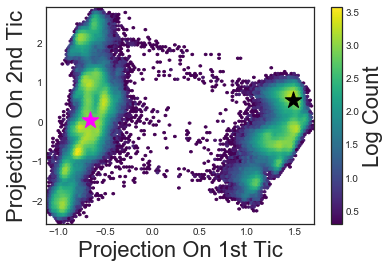

In [115]:
ind1 = np.where(clusterer.cluster_centers_[:,0]>1)[0][0]
ind2 = np.where(clusterer.cluster_centers_[:,0]<2)[0][1]

import seaborn as sns
#figure(figsize=(12,8))
sns.set_style('white')
p=plt.hexbin(txx[:,0],txx[:,1],bins='log',mincnt=1,cmap='viridis')
plt.scatter(clusterer.cluster_centers_[ind1,0],clusterer.cluster_centers_[ind1,1],s=300,c='black',marker='*')
plt.scatter(clusterer.cluster_centers_[ind2,0],clusterer.cluster_centers_[ind2,1],s=300,c='magenta',marker='*')

plt.xlabel("Projection On 1st Tic",size=22)
plt.ylabel("Projection On 2nd Tic", size=22)
cb=plt.colorbar(p)
cb.set_label(size=22,label="Log Count")

In [114]:
from msmbuilder.utils.nearest import KDTree

sub_tica_trajs = [tica_trajs[i] for i in np.arange(0,len(tica_trajs),10)]
ktree=KDTree(sub_tica_trajs)
txx_sub=np.concatenate(sub_tica_trajs)
sl=list(pcca.mapping_.keys())

trj_list = []
for cind in [ind1,ind2]:
    pt = clusterer.cluster_centers_[cind]
    _,(t,f) = ktree.query(pt)
    print(t,f)
    trj_list.append(trajs[t*10][f])
    
trj = trj_list[0]+trj_list[1:]
trj.save_pdb("four.pdb")

0 928
0 4157


In [ ]:
inds = sample_msm(tica_trajs, kmeans.cluster_centers_, msm, n_steps=200, stride=1)
save_generic(inds, "msm-traj-inds.pickl")

## Make trajectory

traj = md.join(
    md.load_frame(meta.loc[traj_i]['traj_fn'], index=frame_i, top=top)
    for traj_i, frame_i in inds
)

## Save
traj_fn = "msm-traj.xtc"
backup(traj_fn)
traj.save(traj_fn)

# Checks - AIC/BIC, HMM, GMM

/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


0
1
2
3
4
5
6
7
8
9


Text(0,0.5,'AIC / BIC')

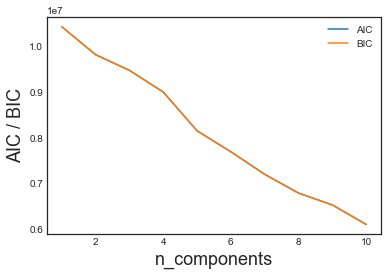

In [87]:
from sklearn import mixture

GMM = mixture.GMM

n_components = np.arange(1, 11)

BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    clf = GMM(n_components=n,
              covariance_type='diag')
    clf.fit(txx)

    AIC[i] = clf.aic(txx)
    BIC[i] = clf.bic(txx)
    
    print (str(i))
    
plt.figure()
plt.plot(n_components, AIC, label='AIC')
plt.plot(n_components, BIC, label='BIC')
plt.legend(loc=0)
plt.xlabel('n_components', fontsize=18)
plt.ylabel('AIC / BIC', fontsize=18)

Text(0,0.5,'BIC')

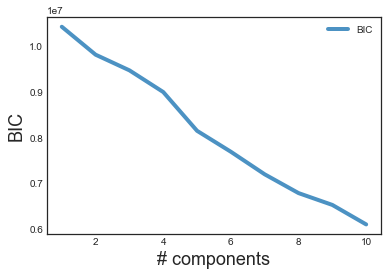

In [88]:
plt.figure()
#plt.plot(n_components, AIC, label='AIC', linewidth=6)
plt.plot(n_components, BIC, label='BIC', alpha=0.8,  linewidth=4)
plt.legend(loc=0)
plt.xlabel('# components', fontsize=18)
plt.ylabel('BIC', fontsize=18)

In [ ]:
msm = GaussianHMM(50, 5)
msm.fit(tica_trajs)
# = msme.plot_pop_resids(msm, color='tarragon')

Exception ignored in: 'msmbuilder.hmm.gaussian._do_mstep_double'
Traceback (most recent call last):
  File "msmbuilder/hmm/gaussian.pyx", line 551, in msmbuilder.hmm.gaussian.GaussianHMM._do_mstep (msmbuilder/hmm/gaussian.cpp:11308)
  File "/Users/sbamos/anaconda3/lib/python3.6/site-packages/numpy/lib/type_check.py", line 318, in nan_to_num
    def nan_to_num(x):
KeyboardInterrupt


/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sbamos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Text(0,0.5,'tIC2')

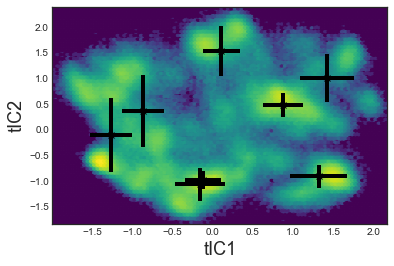

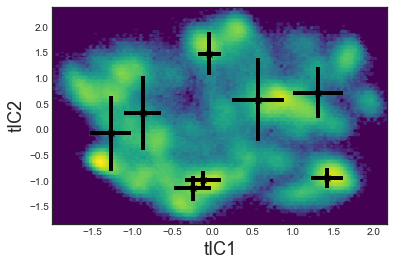

In [101]:
import sklearn

plt.figure()
plt.hexbin(txx[:,0], txx[:, 1], bins='log', cmap='viridis')
plt.errorbar(msm.means_[:, 0], msm.means_[:, 1], xerr=msm.vars_[:,0] ** 0.5, yerr=msm.vars_[:, 1] ** 0.5, fmt='kx', linewidth=4)
plt.xlabel('tIC1', fontsize=18)
plt.ylabel('tIC2', fontsize=18)

mixture = sklearn.mixture.GMM(8)
mixture.fit(txx)

plt.figure()
plt.hexbin(txx[:,0], txx[:, 1], bins='log', cmap='viridis')
plt.errorbar(mixture.means_[:, 0], mixture.means_[:, 1], xerr=mixture.covars_[:,0] ** 0.5, yerr=mixture.covars_[:, 1] ** 0.5, fmt='kx', linewidth=4)
plt.xlabel('tIC1', fontsize=18)
plt.ylabel('tIC2', fontsize=18)



In [107]:
print(msm.summarize())

Gaussian HMM
------------
n_states : 8
logprob: -1954200.354774281
fit_time: 169.185s

populations: [ 0.1165  0.21    0.1567  0.0544  0.1349  0.147   0.058   0.1226]
transmat:
[[ 0.9988  0.      0.001   0.      0.      0.0001  0.      0.    ]
 [ 0.      0.9996  0.      0.      0.      0.      0.      0.0004]
 [ 0.0007  0.      0.9985  0.0006  0.      0.0002  0.      0.0001]
 [ 0.0001  0.      0.0016  0.9983  0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.9997  0.0002  0.      0.    ]
 [ 0.0001  0.      0.0002  0.      0.0002  0.9992  0.0001  0.0002]
 [ 0.      0.      0.      0.      0.      0.0003  0.9997  0.    ]
 [ 0.      0.0007  0.0001  0.      0.      0.0003  0.      0.9989]]
timescales: [ 6792.0805  4536.6395  3542.9389  1161.2961   686.433    667.7546
   361.2454]
    


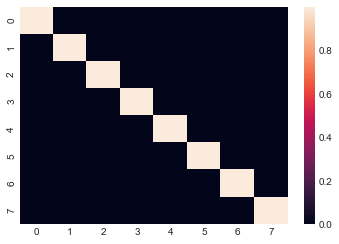

In [108]:
sns.heatmap(msm.transmat_, )

In [ ]:
import pyemma 
pyemma_cluster = pyemma.coordinates.cluster_kmeans(scaled_data, k=50, max_iter=25)
msm_pyemma = pyemma.msm.bayesian_markov_model(pyemma_cluster.dtrajs, lag=50)
pyemma.plots.plot_cktest(msm_pyemma.cktest(6))

# H-bonds

In [ ]:
import mdtraj
from msmexplorer.utils import make_colormap

# Compute Hydrogen Bonding Residue Pairs
baker_hubbard = mdtraj.baker_hubbard(trajs[6], freq=0.1)
top = trajs[0].topology
pairs = [(top.atom(di).residue.index, top.atom(ai).residue.index)
         for di, _, ai in baker_hubbard]

# Create Hydrogen Bonding Network
hbonds = np.zeros((top.n_residues, top.n_residues))
hbonds[list(zip(*pairs))] = 1.

# Make a Colormap
cmap = make_colormap(['rawdenim', 'lightgray', 'pomegranate'])

# Plot Chord Diagram
msme.plot_chord(hbonds, cmap=cmap)

In [ ]:
delta = time.time() - start

delta = delta / 60.0
print("Finished in: " + str(delta) + " minutes.")
